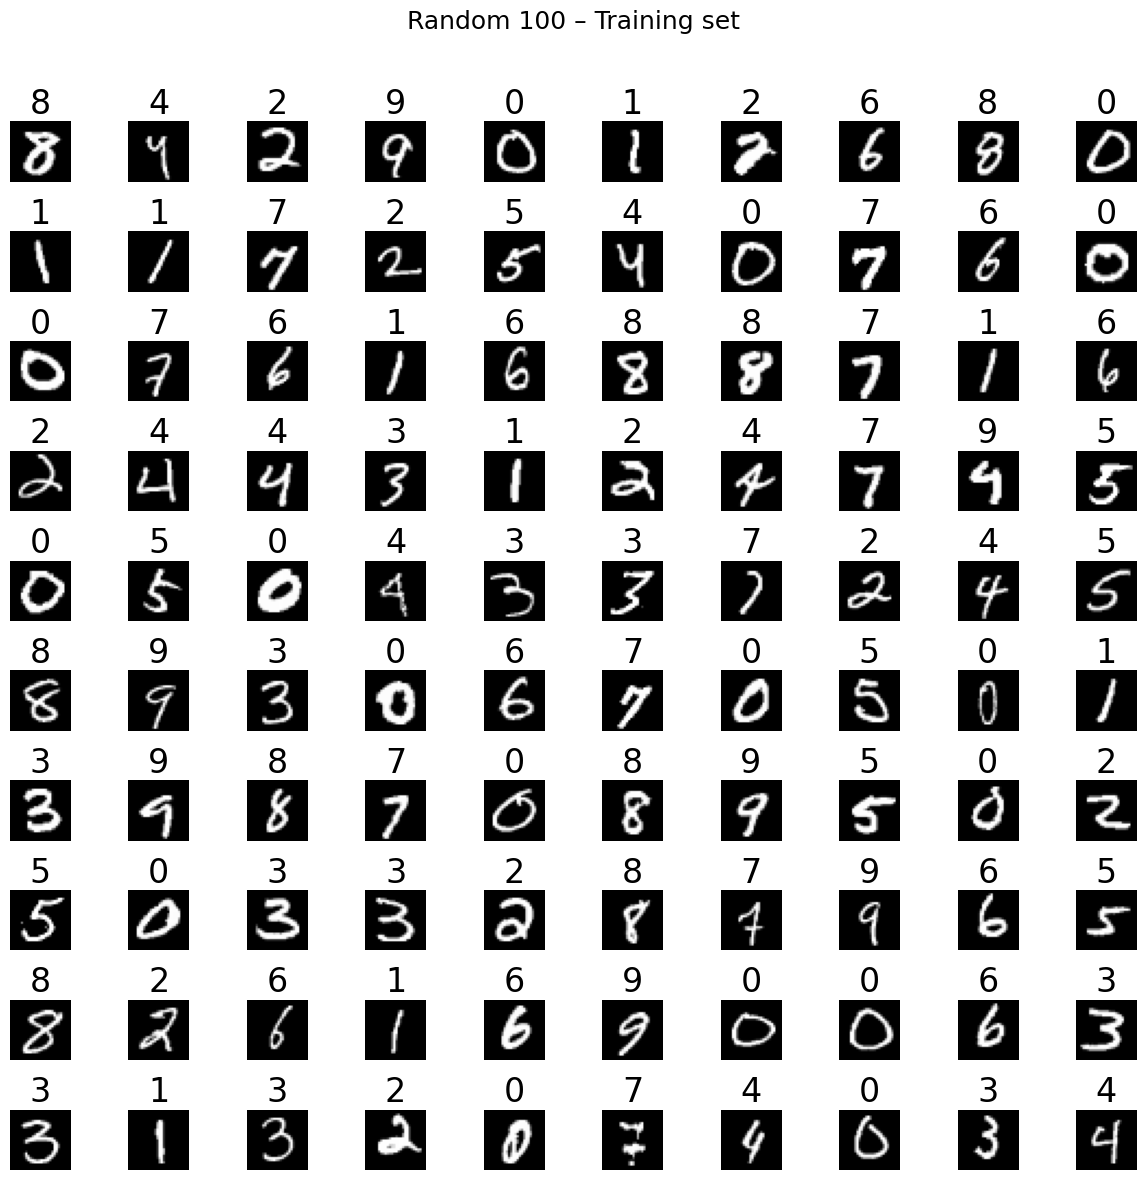

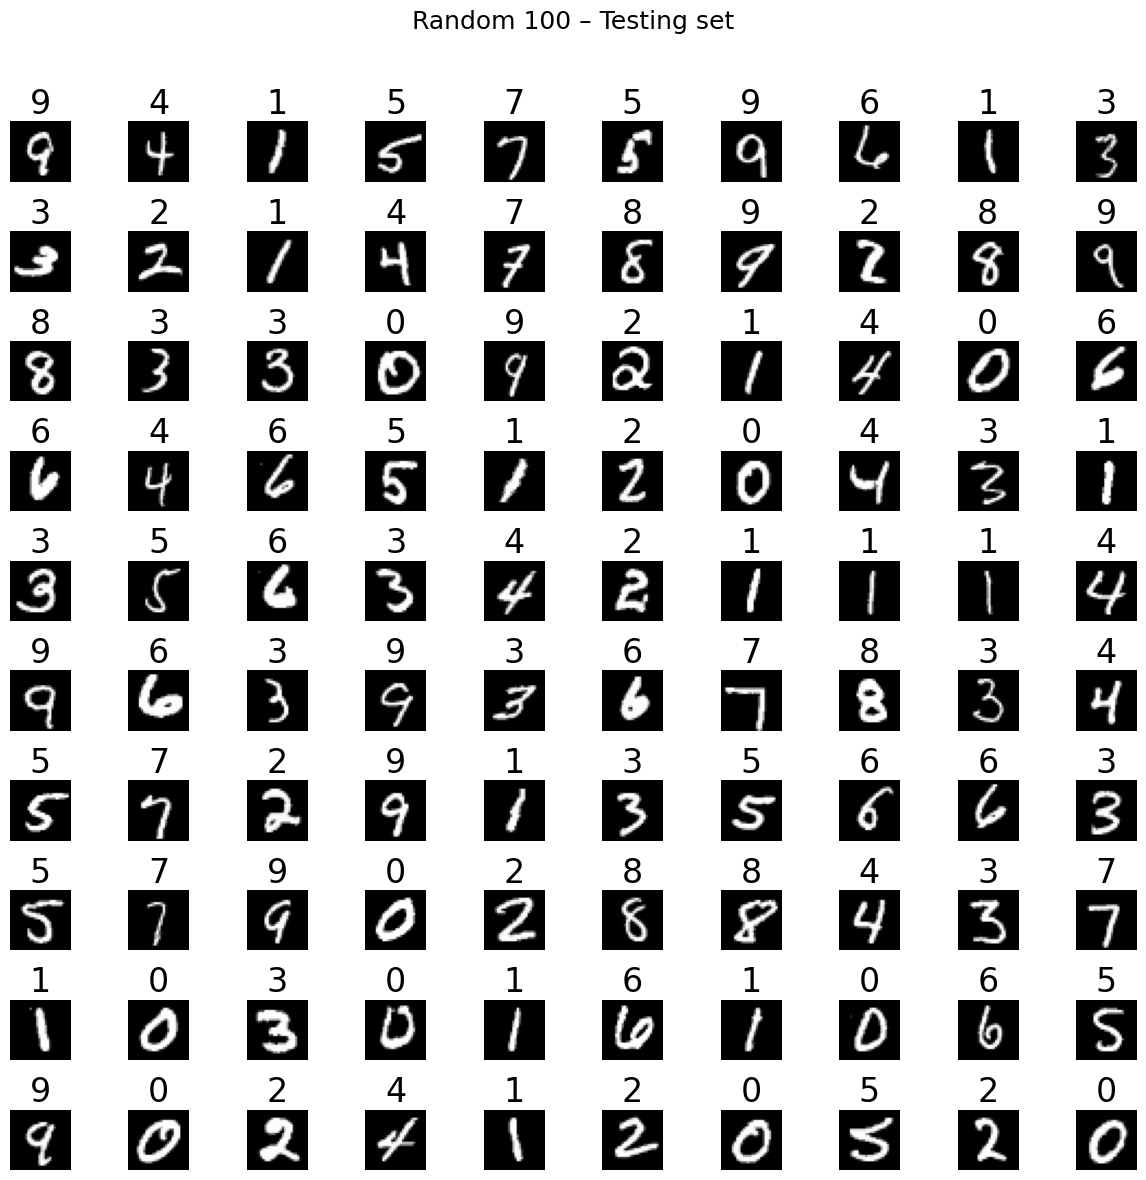

In [3]:
import os
import random
import glob
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tkinter as tk
from tkinter import filedialog

DEFAULT_TRAIN_DIR = "mnist_training"
DEFAULT_TEST_DIR  = "mnist_testing"
SAMPLES = 100             # 뽑을 개수
LABEL_FONTSIZE = 24       

def select_folder_dialog(title_text):
    print(f"{title_text} 창을 띄웁니다...")
    root = tk.Tk()
    root.withdraw()             # 메인 윈도우 숨김
    root.attributes('-topmost', True) # 창을 맨 앞으로
    folder_path = filedialog.askdirectory(title=title_text)
    root.destroy()
    return folder_path

if os.path.exists(DEFAULT_TRAIN_DIR):
    TRAIN_DIR = DEFAULT_TRAIN_DIR
else:
    print(f"'{DEFAULT_TRAIN_DIR}' 폴더를 찾을 수 없습니다.")
    TRAIN_DIR = select_folder_dialog("학습 데이터(mnist_training) 폴더를 선택하세요")
    if not TRAIN_DIR:
        print("폴더가 선택되지 않았습니다. 종료합니다.")
        sys.exit()

# 테스트 폴더 확인
if os.path.exists(DEFAULT_TEST_DIR):
    TEST_DIR = DEFAULT_TEST_DIR
else:
    print(f"'{DEFAULT_TEST_DIR}' 폴더를 찾을 수 없습니다.")
    TEST_DIR = select_folder_dialog("테스트 데이터(mnist_testing) 폴더를 선택하세요")
    if not TEST_DIR:
        print("폴더가 선택되지 않았습니다. 종료합니다.")
        sys.exit()

print(f"Train Dir: {TRAIN_DIR}")
print(f"Test Dir:  {TEST_DIR}")

def load_paths(root):
    paths_labels = []
    if not os.path.exists(root):
        print(f"Error: {root} 경로가 실제로는 존재하지 않습니다.")
        return []
        
    for d in os.listdir(root):
        full_path = os.path.join(root, d)
        if os.path.isdir(full_path) and d.isdigit():
            label = int(d)
            files = glob.glob(os.path.join(full_path, "*.*"))
            paths_labels += [(p, label) for p in files]
    return paths_labels

def show_samples(paths_labels, title):
    if not paths_labels:
        print(f"'{title}'에 표시할 이미지가 없습니다.")
        return

    sample_count = min(SAMPLES, len(paths_labels))
    picks = random.sample(paths_labels, sample_count)
    
    images = [np.asarray(Image.open(p).convert("L")) for p, _ in picks]
    labels = [lbl for _, lbl in picks]

    plt.figure(figsize=(12, 12))
    plt.suptitle(title, fontsize=18)
    
    rows = int(np.ceil(np.sqrt(sample_count)))
    cols = int(np.ceil(sample_count / rows))
    
    for i, (img, lbl) in enumerate(zip(images, labels), 1):
        plt.subplot(10, 10, i)
        plt.imshow(img, cmap='gray')
        plt.title(lbl, fontsize=LABEL_FONTSIZE)
        plt.axis('off')
        
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

train_paths = load_paths(TRAIN_DIR)
test_paths  = load_paths(TEST_DIR)

show_samples(train_paths, "Random 100 – Training set")
show_samples(test_paths,  "Random 100 – Testing set")